<a href="https://colab.research.google.com/github/PrasannaMadiwar/kaggle_competitions/blob/main/Tabular_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [149]:
train = pd.read_csv('/content/train.csv',engine='python')
test1 = pd.read_csv('/content/test.csv')
test = test1.copy()
edit = [train,test]

In [127]:
train.sample(5)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
16361,16361,D,72.96,material_7,material_5,6,6,6,10,6,...,10.551,15.716,20.277,13.193,15.358,15.534,13.141,18.841,NaN,0
15742,15742,C,170.96,material_7,material_8,5,8,4,12,4,...,12.234,15.757,17.146,10.507,NaN,NaN,18.333,14.474,665.620,1
18106,18106,D,139.23,material_7,material_5,6,6,7,15,6,...,14.751,17.491,19.888,11.112,16.959,16.510,14.787,NaN,701.040,0
4650,4650,A,121.67,material_7,material_8,9,5,7,1,11,...,11.581,17.158,21.413,15.042,15.523,16.235,NaN,20.384,555.185,0
5578,5578,B,85.71,material_5,material_5,8,8,7,14,6,...,12.820,13.088,19.731,11.745,15.851,15.636,19.456,15.529,NaN,0


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [129]:
train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [130]:
train.isna().sum()

,0
id,0
product_code,0
loading,250
attribute_0,0
attribute_1,0
attribute_2,0
attribute_3,0
measurement_0,0
measurement_1,0
measurement_2,0


In [131]:
train.corr(numeric_only=True)

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,1.000000,0.004305,-0.741200,0.558881,-0.253626,0.400206,0.000128,-0.005923,0.011313,-0.007001,...,0.001550,-0.029611,0.009524,-0.151220,-0.037559,-0.053744,0.083951,-0.059849,-0.000983,-0.007545
loading,0.004305,1.000000,-0.008208,-0.000756,-0.005578,0.002532,0.000303,-0.005203,-0.011792,-0.005599,...,-0.007751,-0.007525,0.003594,-0.002407,0.006138,0.000120,-0.008087,-0.000633,0.000305,0.129089
attribute_2,-0.741200,-0.008208,1.000000,-0.538697,0.175387,-0.377971,0.030522,0.005849,-0.011797,0.006811,...,-0.000098,-0.004953,0.094038,0.226756,0.049639,0.020921,-0.161242,0.035795,0.004729,0.006337
attribute_3,0.558881,-0.000756,-0.538697,1.000000,-0.370232,0.329233,0.013258,-0.002265,0.015470,-0.004034,...,-0.002295,-0.100845,-0.025434,-0.132060,0.028472,-0.049711,0.187519,-0.061520,-0.001418,-0.019222
measurement_0,-0.253626,-0.005578,0.175387,-0.370232,1.000000,-0.255255,-0.083813,-0.004890,-0.006459,0.003304,...,0.009112,0.032779,0.001878,0.033496,-0.031527,0.021907,-0.055431,0.003025,0.003351,0.009646
measurement_1,0.400206,0.002532,-0.377971,0.329233,-0.255255,1.000000,0.005032,-0.008363,0.001535,-0.005587,...,0.004529,0.011986,-0.035312,-0.084605,0.007523,-0.011471,0.060870,-0.004509,-0.004651,-0.010810
measurement_2,0.000128,0.000303,0.030522,0.013258,-0.083813,0.005032,1.000000,-0.002751,-0.009797,0.000241,...,0.001884,0.018695,-0.003877,-0.001808,0.029145,0.014623,0.000138,0.033088,-0.009596,0.015808
measurement_3,-0.005923,-0.005203,0.005849,-0.002265,-0.004890,-0.008363,-0.002751,1.000000,0.009573,0.009864,...,0.008195,-0.004854,-0.004427,0.002445,0.005893,0.002150,-0.010986,-0.002164,0.080902,0.003577
measurement_4,0.011313,-0.011792,-0.011797,0.015470,-0.006459,0.001535,-0.009797,0.009573,1.000000,0.005113,...,0.009080,-0.012998,-0.002784,-0.002586,-0.002454,-0.001713,-0.004567,0.002929,0.193045,-0.010488
measurement_5,-0.007001,-0.005599,0.006811,-0.004034,0.003304,-0.005587,0.000241,0.009864,0.005113,1.000000,...,-0.003589,0.002170,0.005306,0.000858,-0.009325,0.008720,-0.009101,-0.002996,0.450024,0.018079


In [132]:
train['measurement_3'].value_counts()

,count
measurement_3,
17.841,22
17.814,22
17.622,21
17.750,21
17.374,21
...,...
15.949,1
20.532,1
19.224,1


In [150]:
cat_col = ['attribute_0','attribute_1','attribute_2','attribute_3','measurement_0','measurement_1','measurement_2','product_code']
num_col = ['measurement_17','measurement_0','measurement_1','measurement_2','measurement_3','measurement_4','measurement_5','measurement_6','measurement_7','measurement_8','measurement_9','measurement_10','measurement_11','measurement_12','measurement_13','measurement_14','measurement_15','measurement_16']

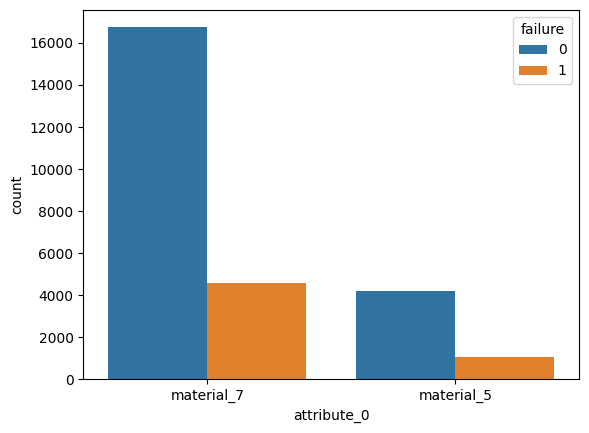

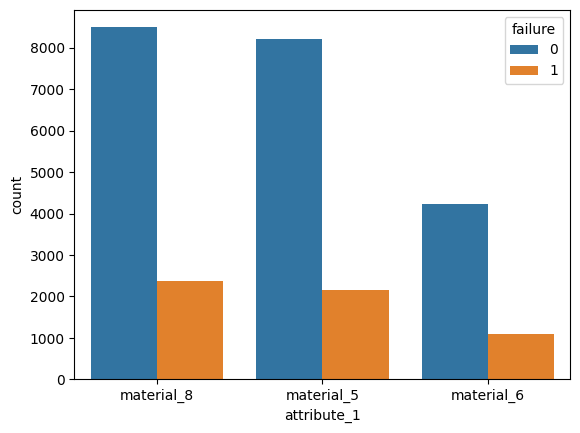

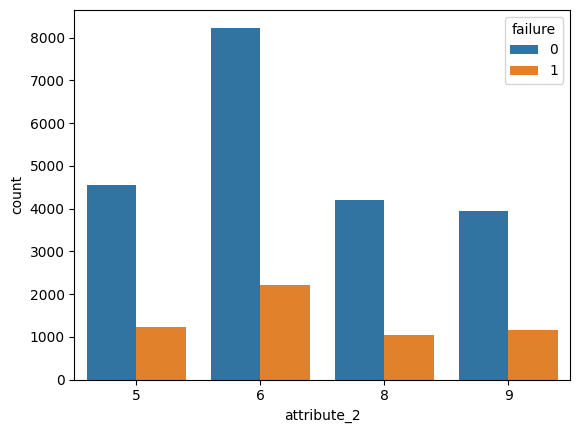

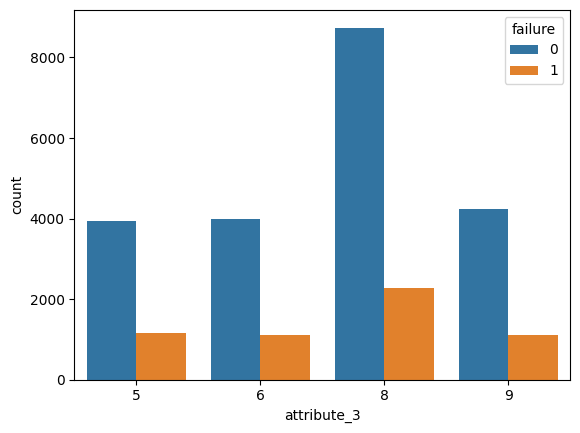

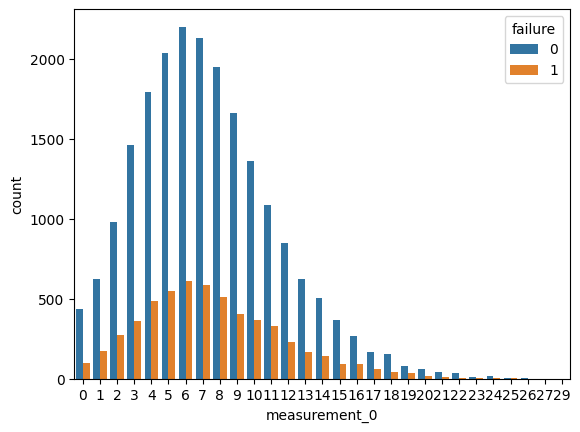

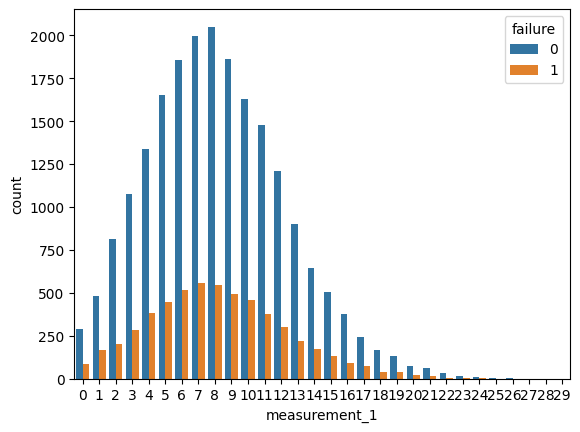

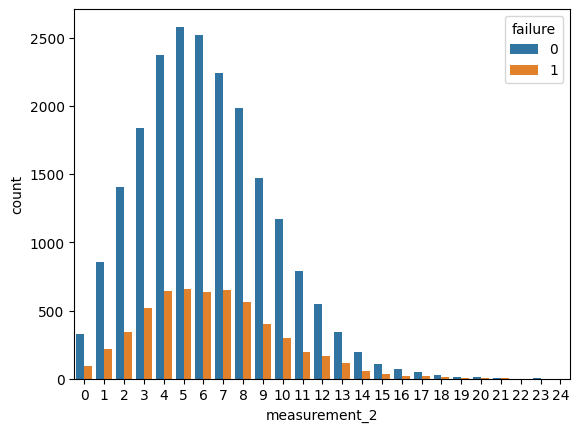

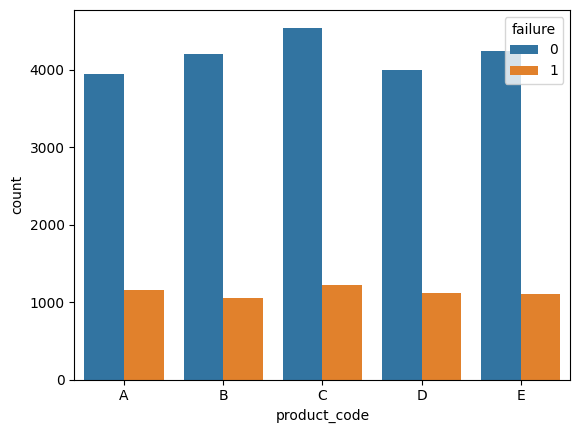

In [134]:
for i in cat_col:
  sns.countplot(x=i,data=train,hue='failure')
  plt.show()

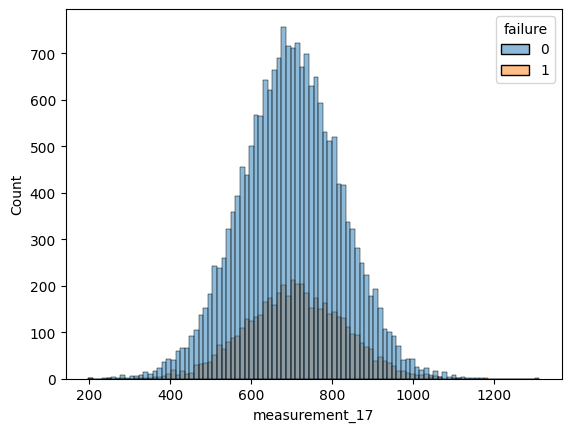

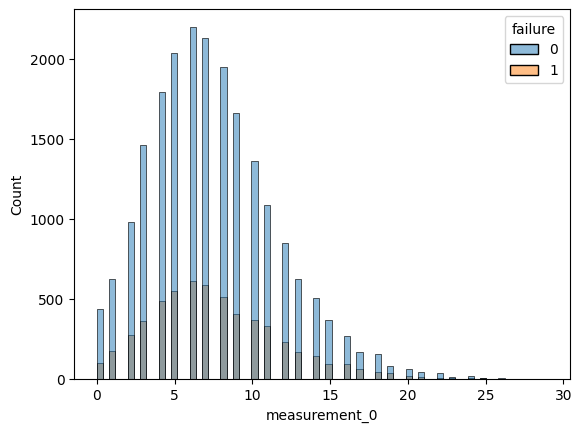

KeyboardInterrupt: 

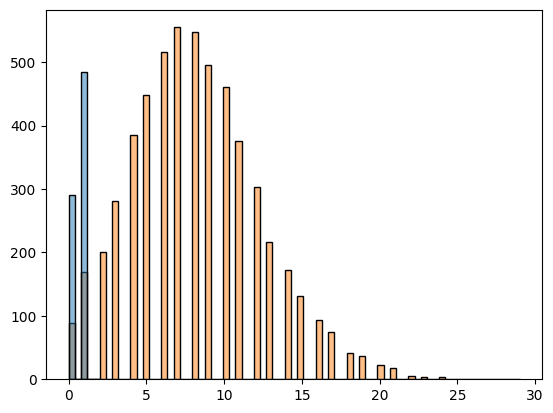

In [135]:
for i in num_col:
  sns.histplot(x=i,data=train,hue='failure')
  plt.show()

In [151]:
attribute = ['attribute_0','attribute_1','attribute_2','attribute_3','measurement_0','measurement_1','measurement_2']
measurements = ['measurement_17','measurement_3','measurement_4','measurement_5','measurement_6','measurement_7','measurement_8','measurement_9','measurement_10','measurement_11','measurement_12','measurement_13','measurement_14','measurement_15','measurement_16']

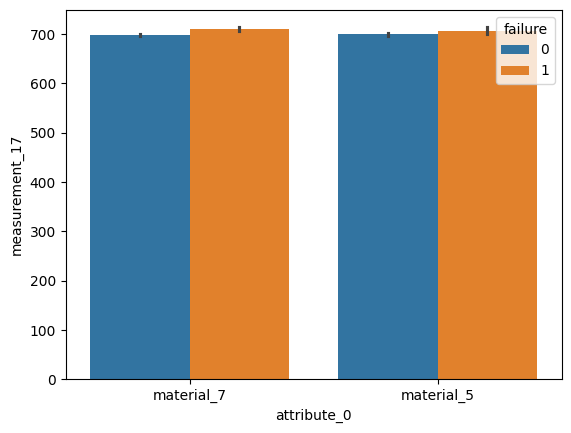

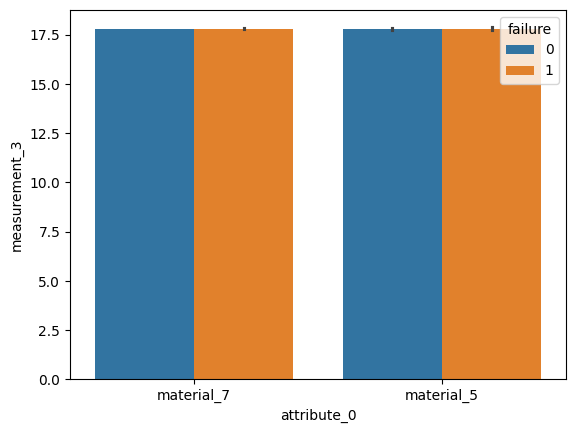

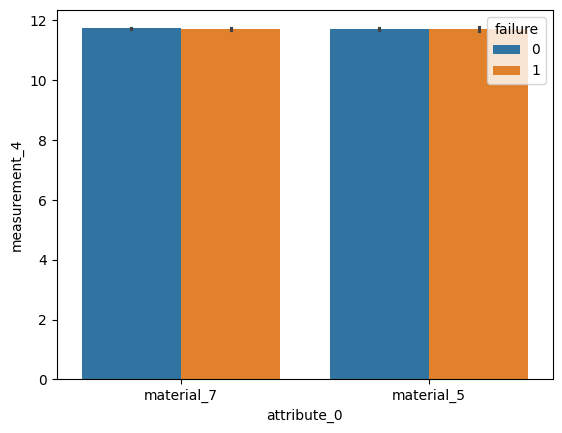

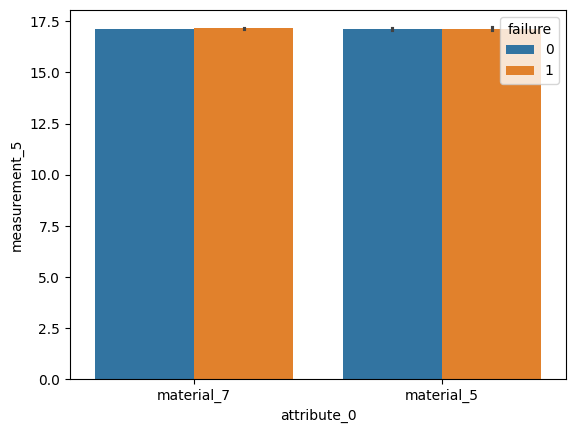

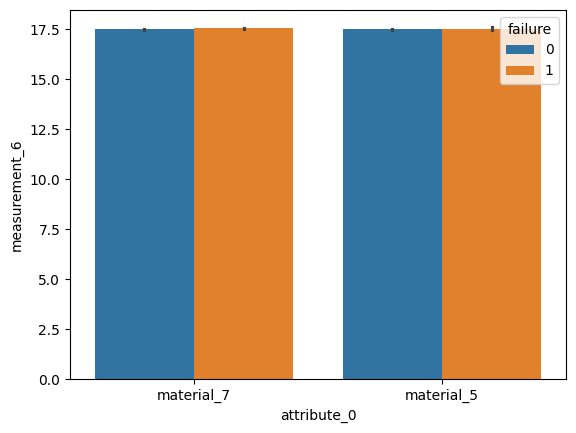

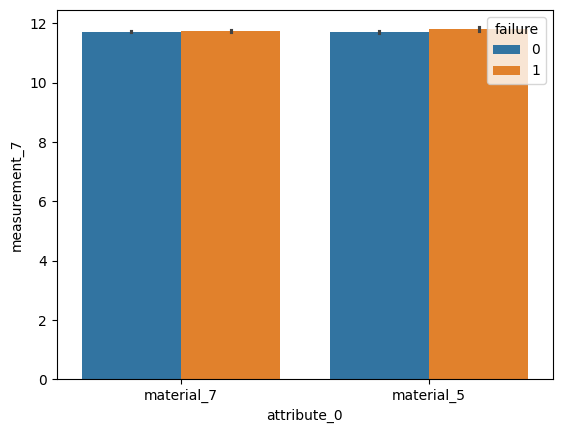

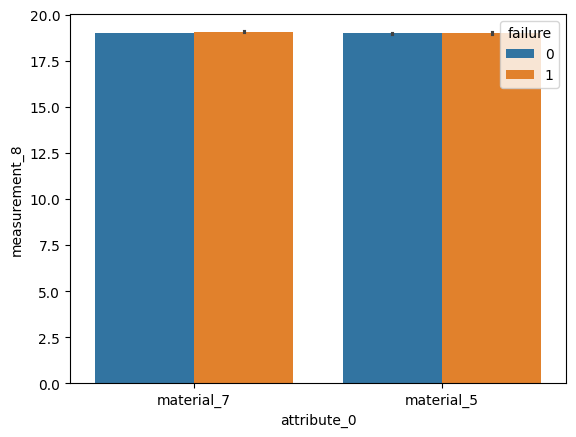

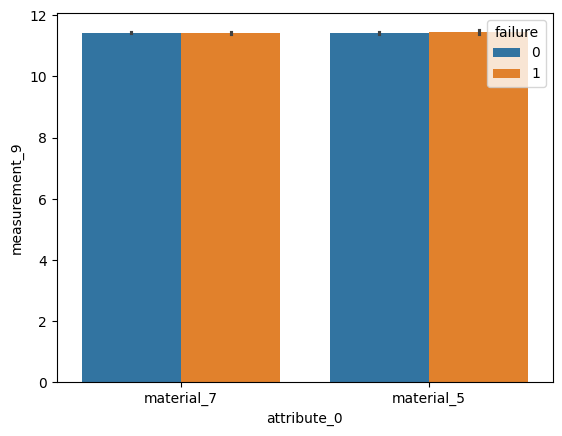

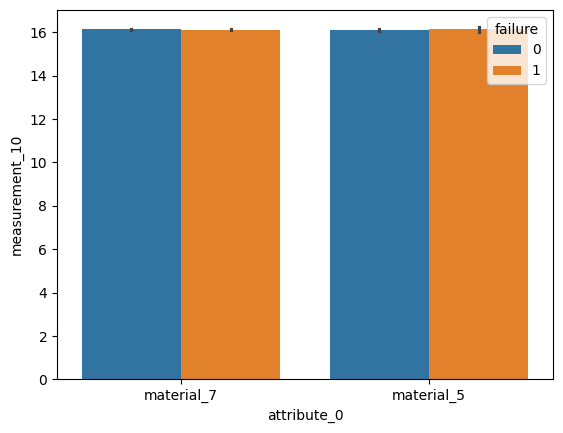

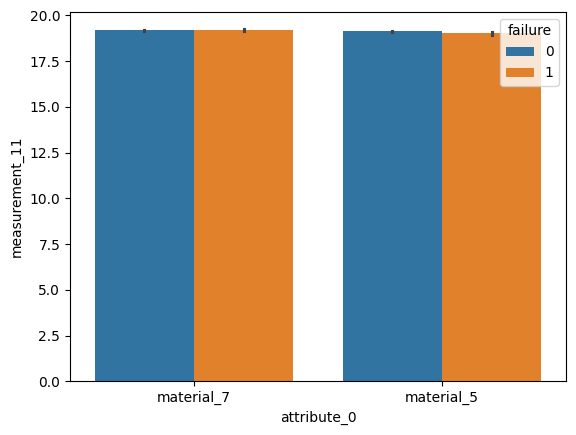

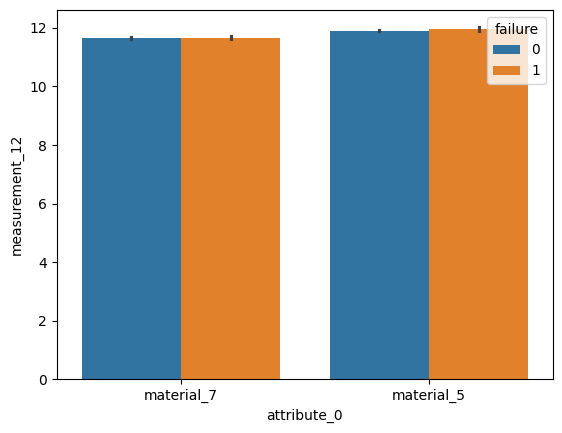

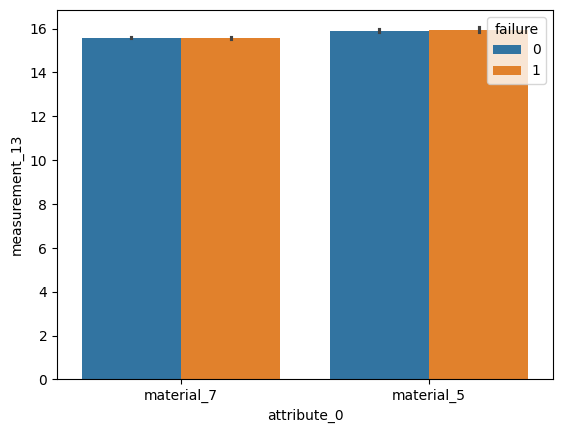

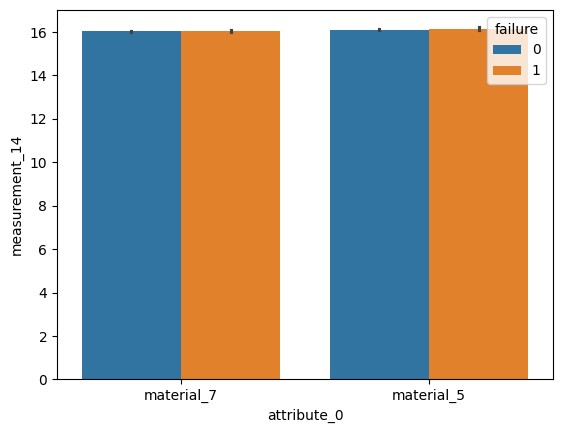

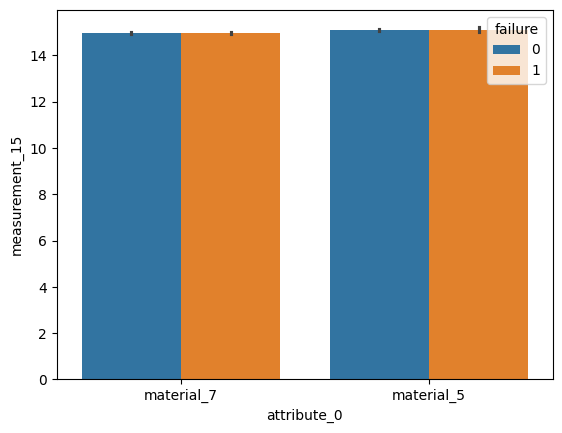

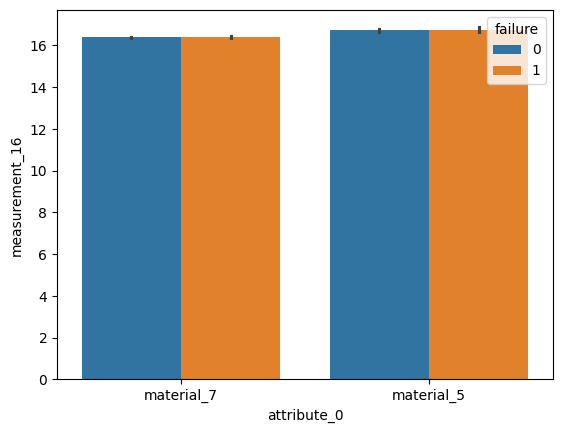

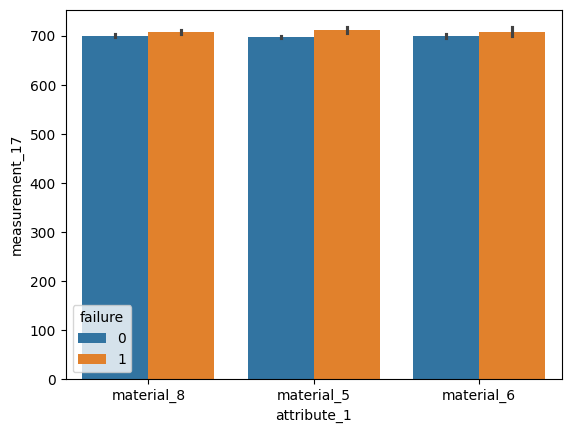

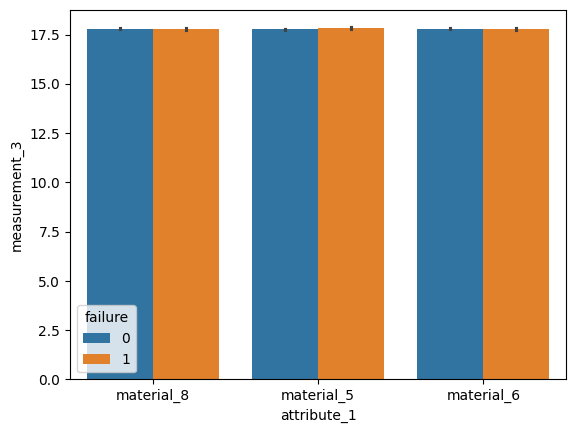

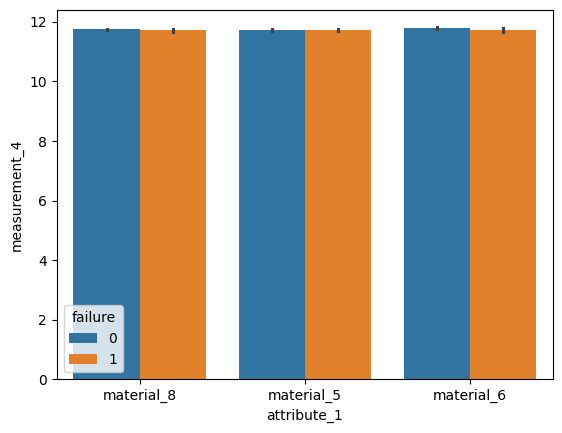

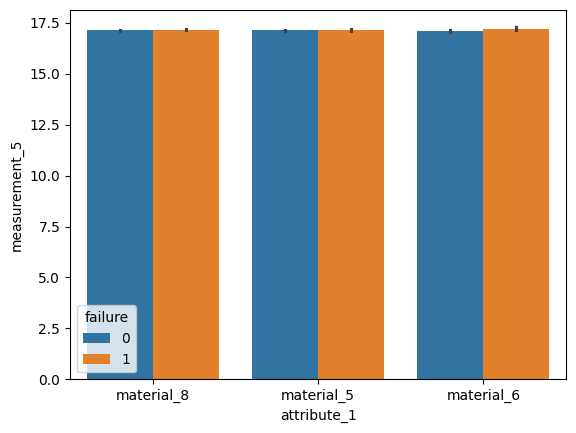

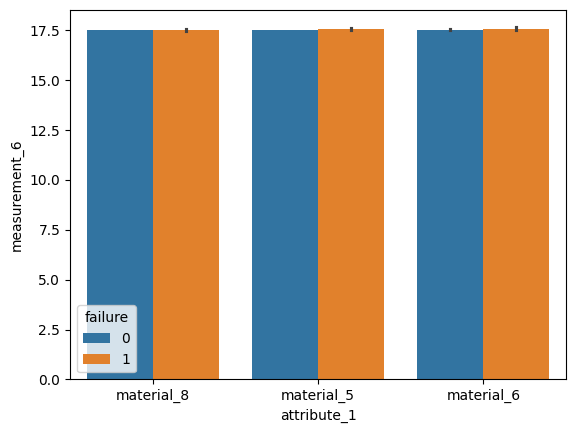

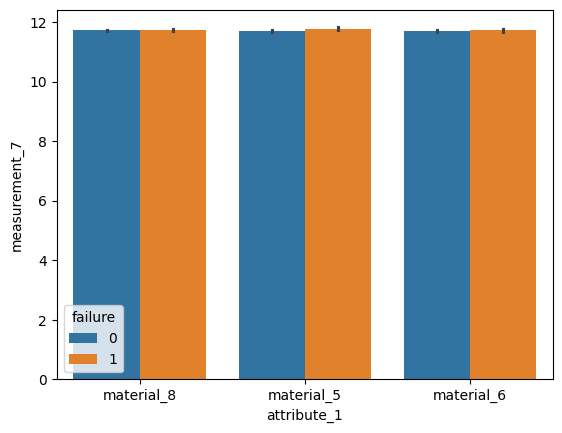

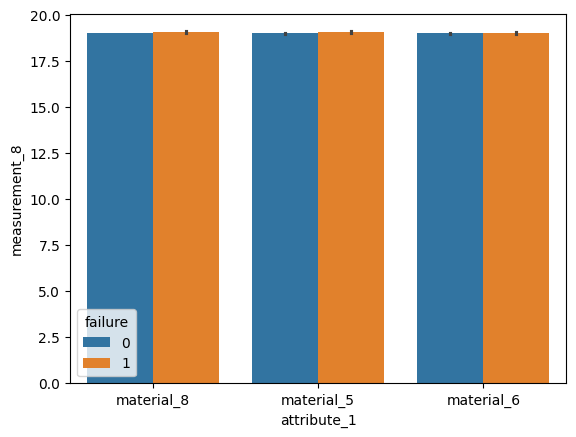

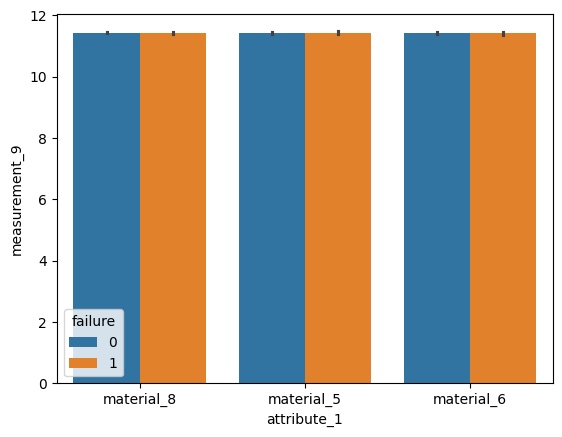

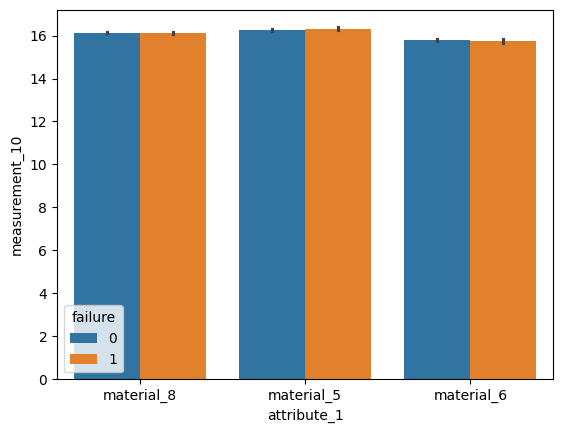

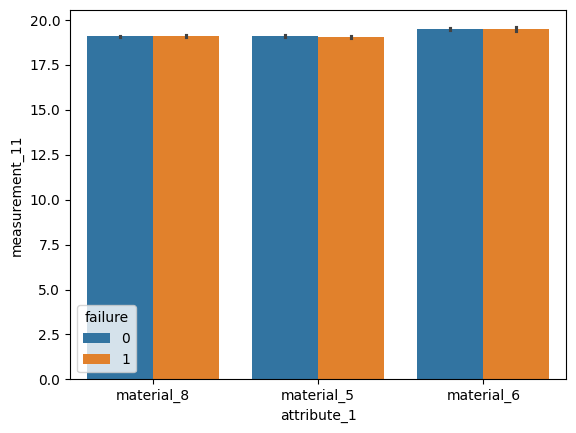

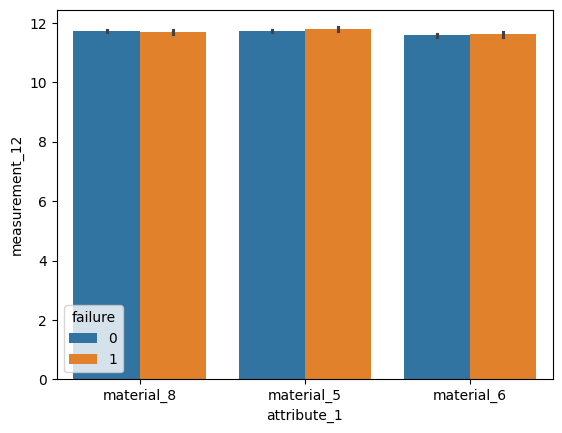

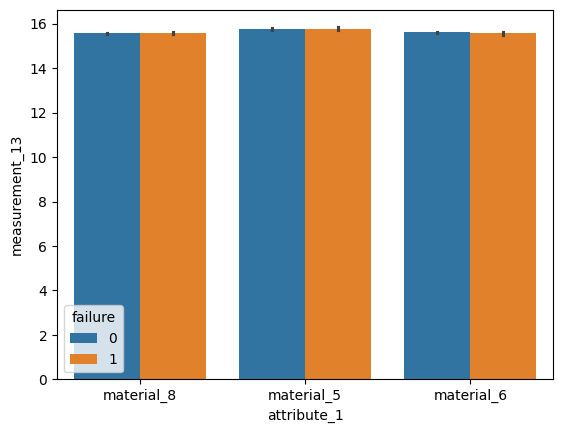

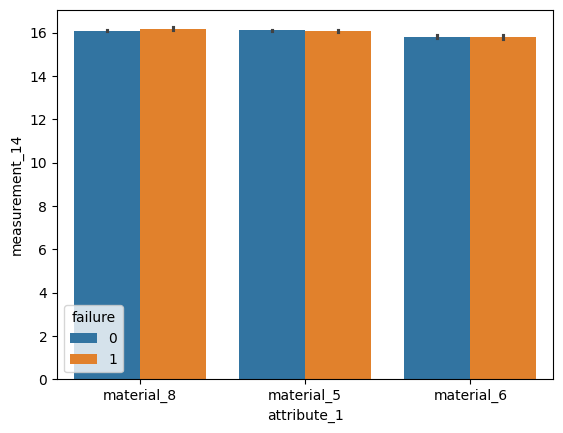

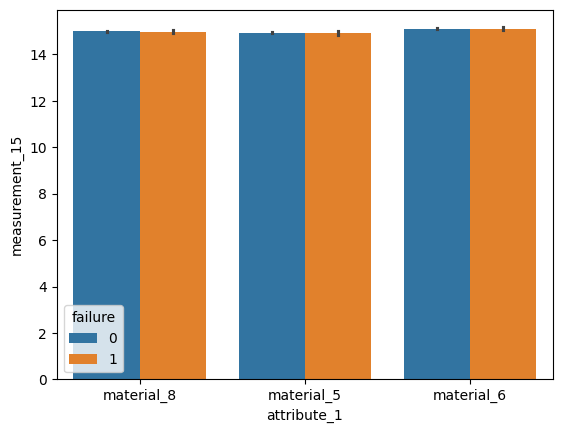

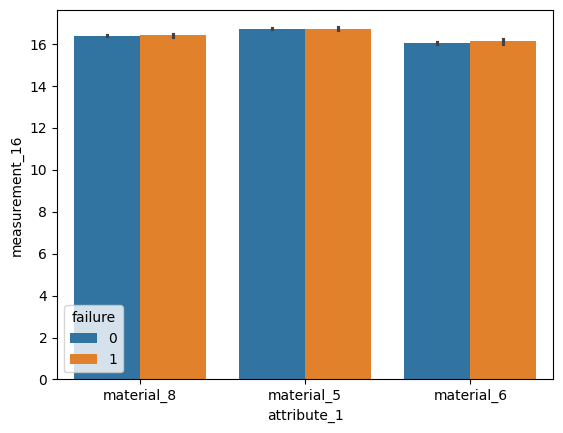

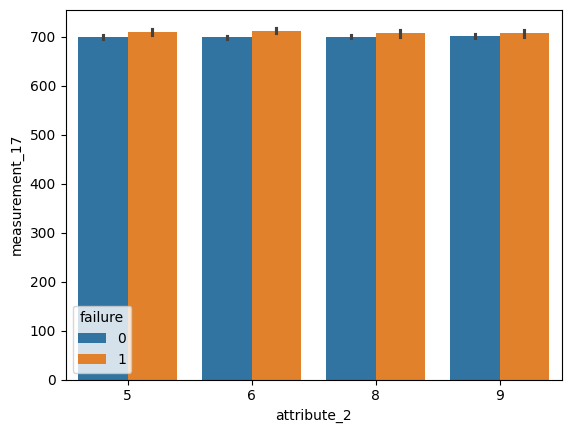

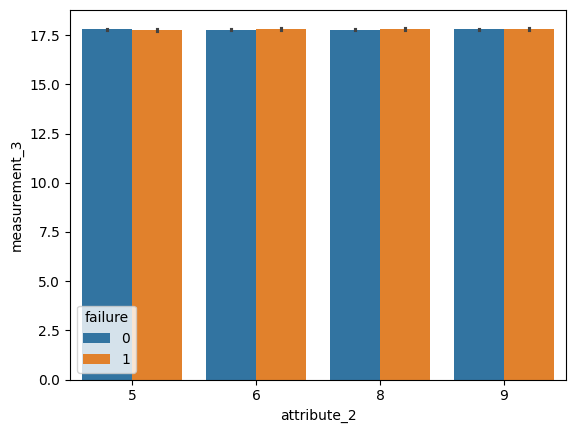

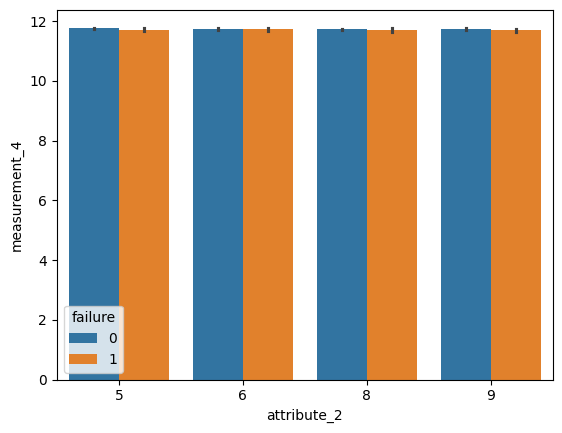

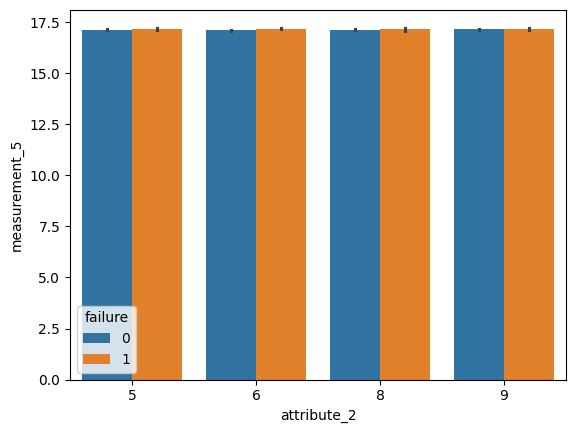

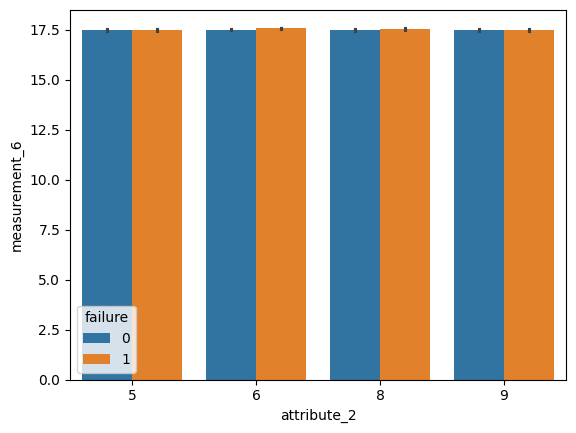

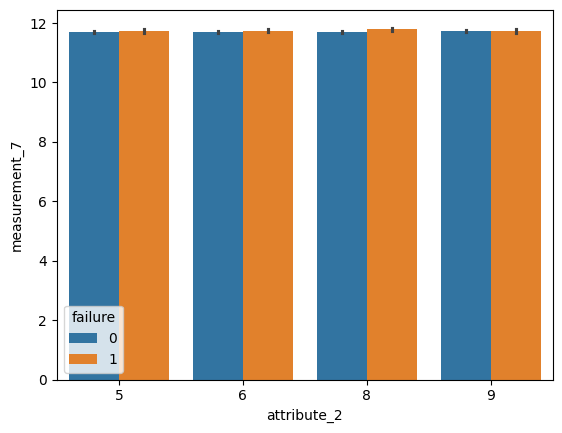

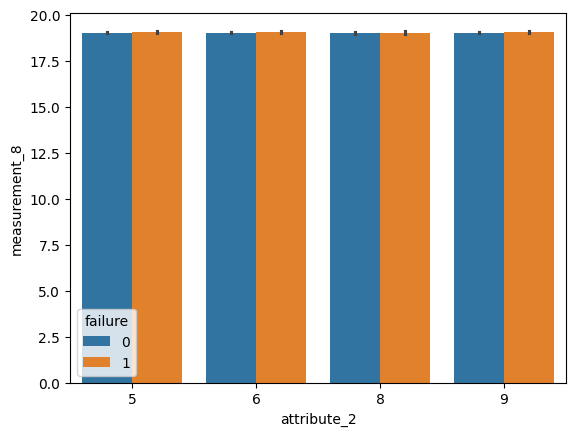

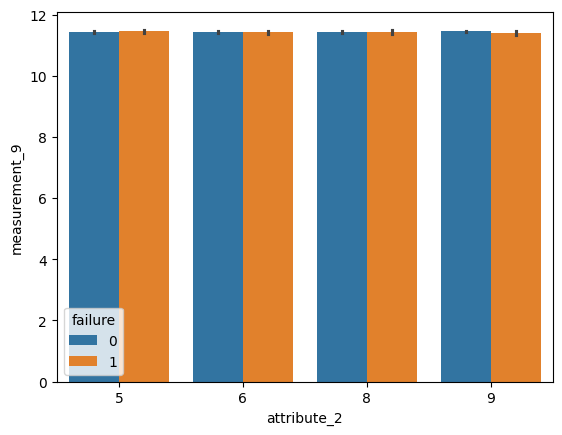

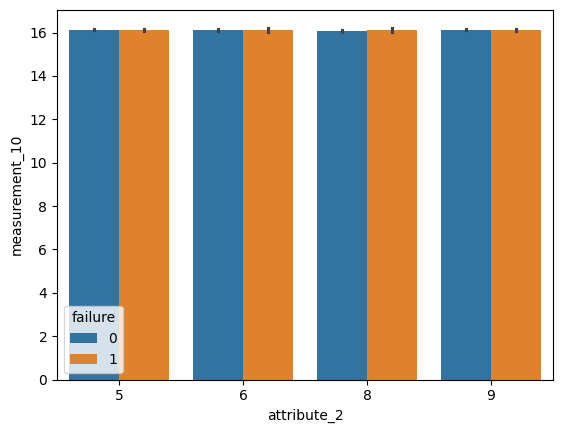

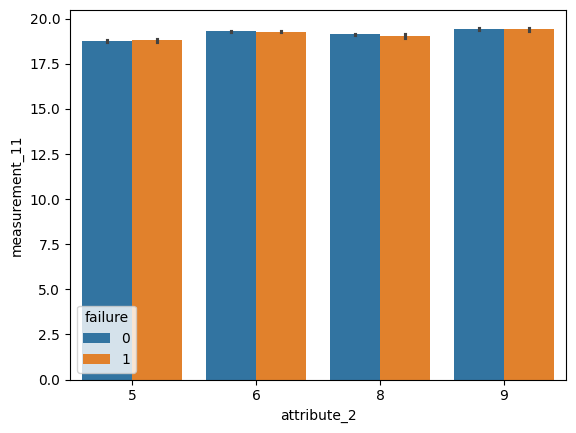

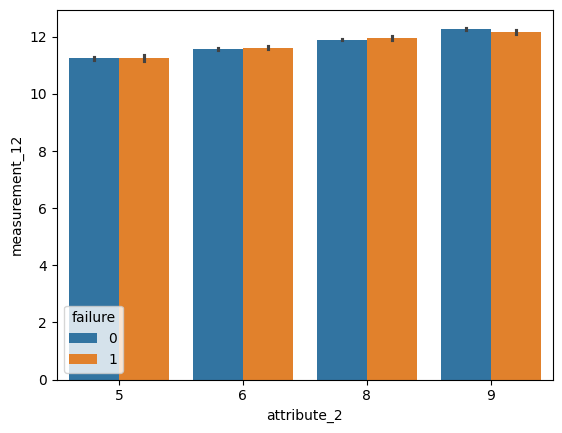

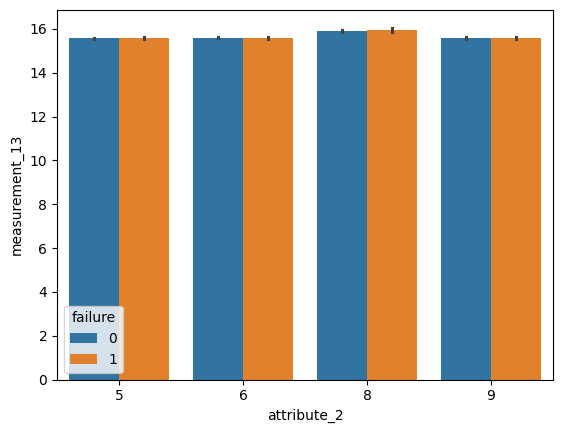

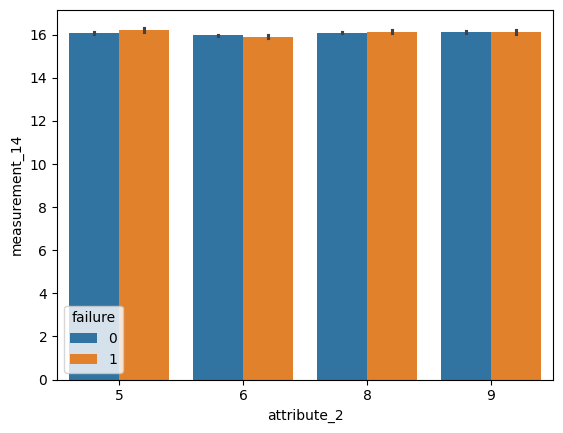

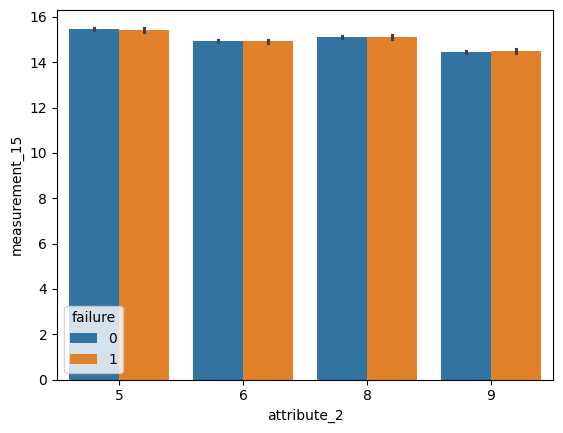

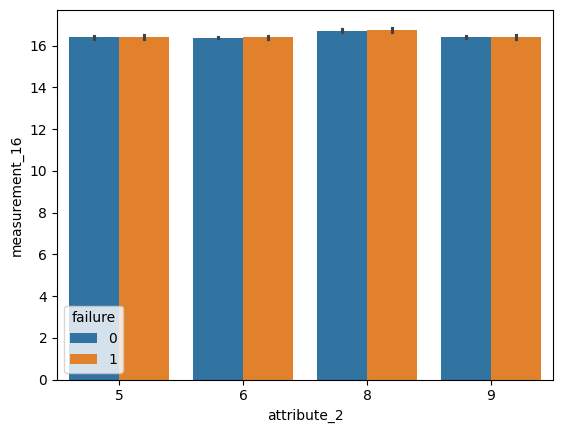

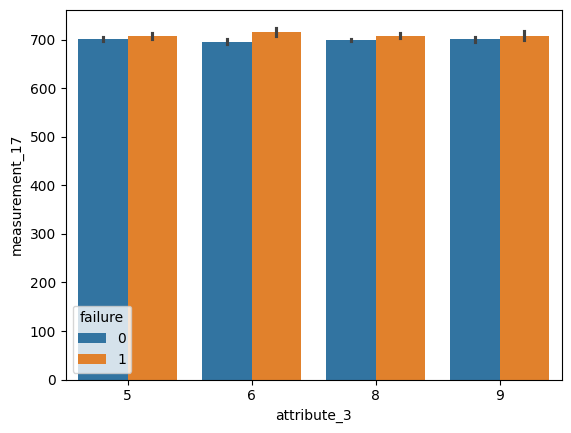

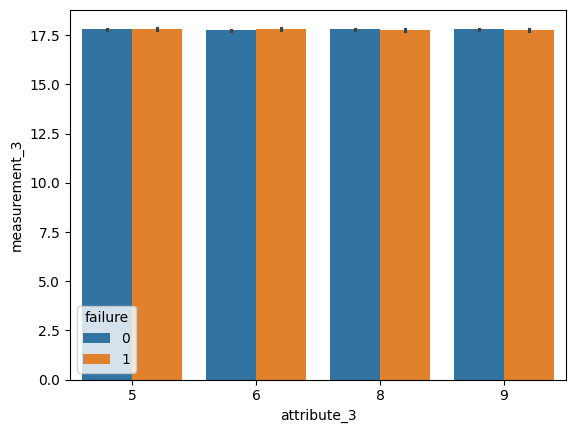

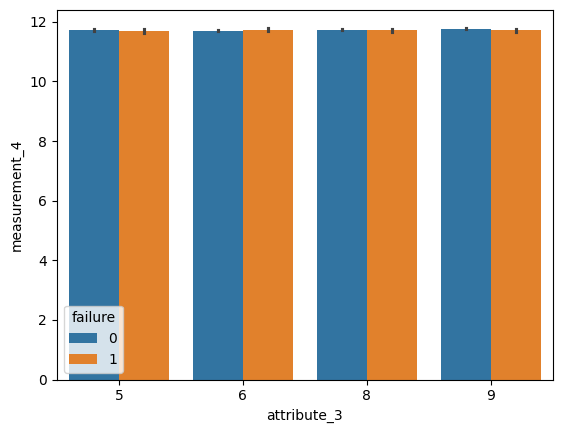

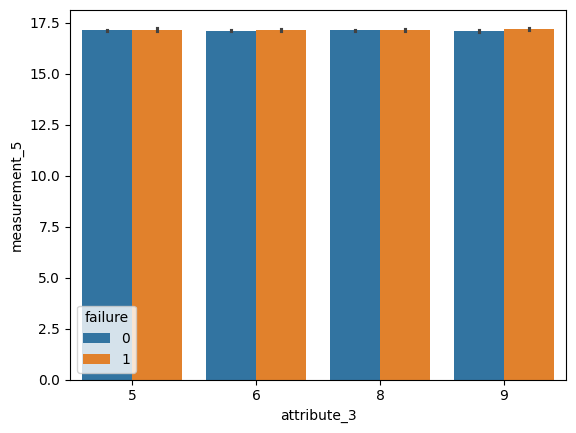

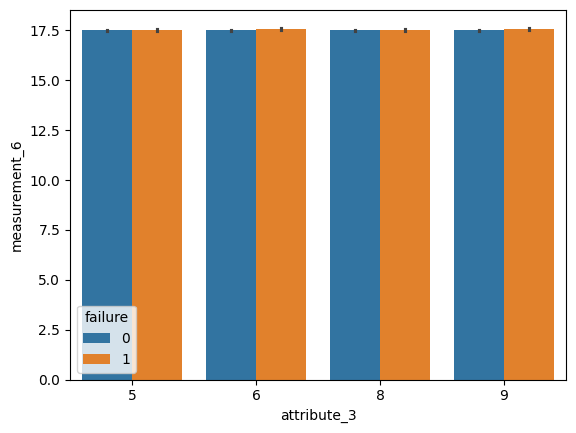

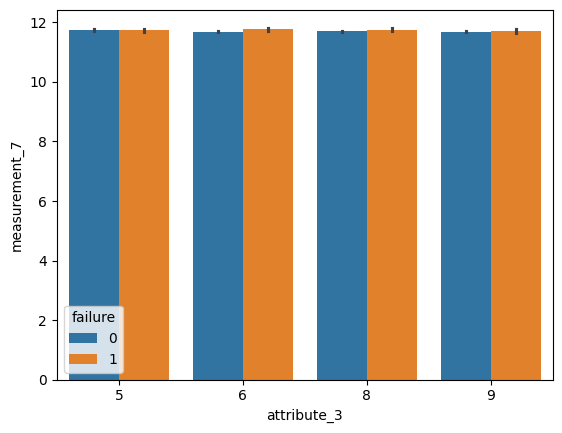

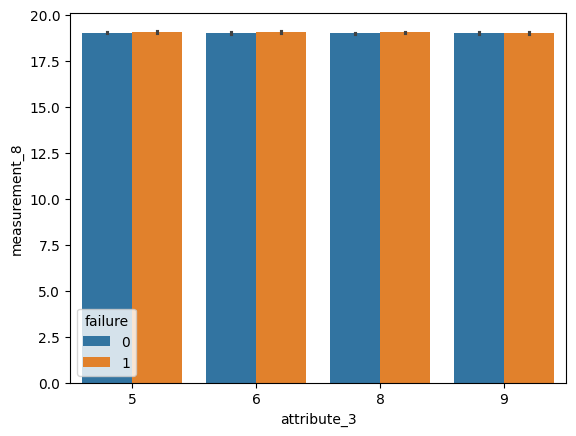

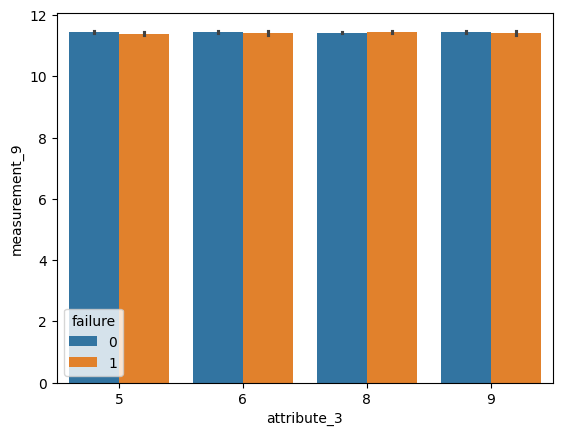

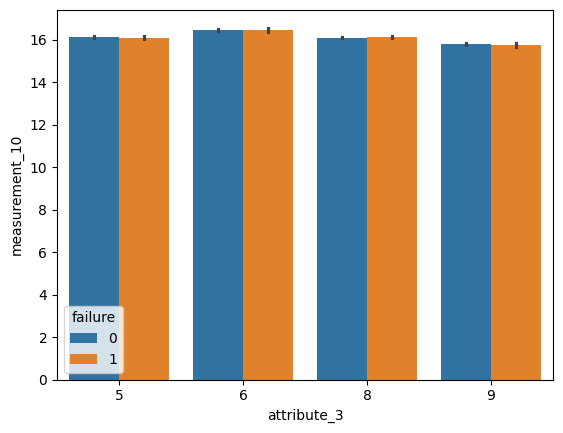

KeyboardInterrupt: 

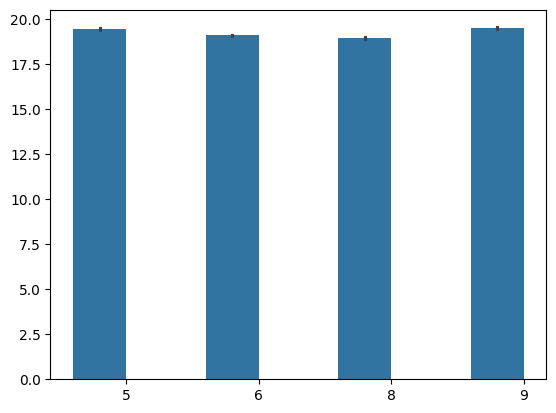

In [152]:
for i in attribute:
  for j in mearuments:
    sns.barplot(x=i,y=j,data=train,hue='failure')
    plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'colr'

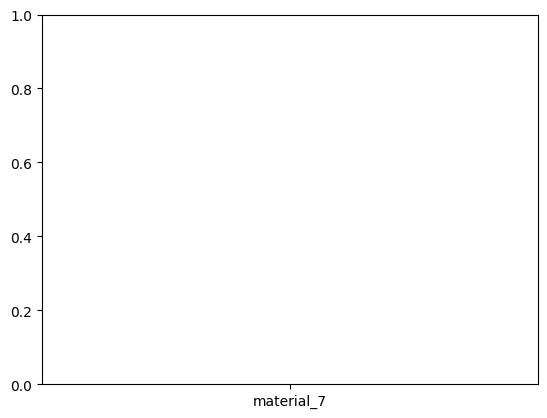

In [153]:
for i in attribute:
  for j in measurements:
    plt.plot(train[i],train[j],colr='red')
    plt.show()

In [154]:
for data in edit:
  for cat in cat_col:
    mode =data[cat].mode()[0]
    data[cat].fillna(value=mode,inplace=True)

In [155]:
for data in edit:
  for num in measurements:
    mean = data[num].mean()
    data[num].fillna(value=mean,inplace=True)

In [156]:
train.isna().sum()

,0
id,0
product_code,0
loading,250
attribute_0,0
attribute_1,0
attribute_2,0
attribute_3,0
measurement_0,0
measurement_1,0
measurement_2,0


In [157]:
mapping_at0 = {
    'material_5': 5,
    'material_7': 7
}

for data in edit:
    data['attribute_0'] = data['attribute_0'].map(mapping_at0).astype(int)

In [158]:
test['attribute_1'].value_counts()

,count
attribute_1,
material_6,10529
material_5,5228
material_7,5018


In [159]:
mapping_at1 = {
    'material_5': 5,
    'material_6': 6,
    'material_8': 8,
    'material_7': 7
}

for data in edit:
    data['attribute_1'] = data['attribute_1'].map(mapping_at1).astype(int)


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  int64  
 4   attribute_1     20775 non-null  int64  
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20775 non-null  float64
 11  measurement_4   20775 non-null  float64
 12  measurement_5   20775 non-null  float64
 13  measurement_6   20775 non-null  float64
 14  measurement_7   20775 non-null  float64
 15  measurement_8   20775 non-null  float64
 16  measurement_9   20775 non-null  float64
 17  measurement_10  20775 non-null 

In [161]:
for data in edit:
  data['attributr_t'] = data['attribute_0'] + data['attribute_1'] + data['attribute_2'] + data['attribute_3']+data['measurement_0']+data['measurement_1']+data['measurement_2']
  data.drop(['attribute_0','attribute_1','attribute_2','attribute_3','measurement_0','measurement_1','measurement_2'],axis=1,inplace=True)

In [162]:
for data in edit:
  data['measurement_t'] = data['measurement_3'] + data['measurement_4'] + data['measurement_5'] + data['measurement_6'] + data['measurement_7'] + data['measurement_8'] + data['measurement_9'] + data['measurement_10'] + data['measurement_11'] + data['measurement_12'] + data['measurement_13'] + data['measurement_14'] + data['measurement_15'] + data['measurement_16'] + data['measurement_17']
  data.drop(measurements,axis=1,inplace=True)

In [163]:
le = LabelEncoder()
for data in edit :

  data['product_code'] = le.fit_transform(data['product_code'])


In [164]:
train.sample(5)

,id,product_code,loading,failure,attributr_t,measurement_t
14890,14890,2,145.21,0,56,852.524804
13387,13387,2,114.96,0,44,1118.820444
14124,14124,2,65.98,0,43,1068.361554
22360,22360,4,132.01,1,61,822.214444
879,879,0,99.58,0,45,894.839000


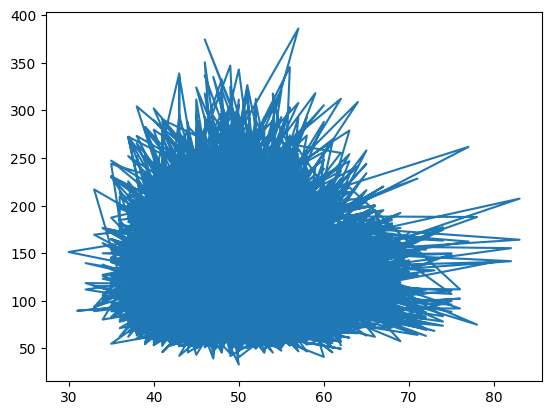

In [165]:
plt.plot(train['attributr_t'],train['loading'])

In [ ]:
for data in edit:
  median = data.groupby(['product_code','loading']).size().unstack(fill_value=0)
  most_loading = median.idxmax(axis=1)
  mis = data['loading'].isnull()
  com = data['product_code'].isin(most_loading.index)
  fill = mis & com
  data.loc[fill,'loading'] = data.loc[fill,'product_code'].map(most_loading)

In [166]:
for data in edit:
  data.drop('id',axis=1,inplace=True)

In [167]:
X = train.drop('failure',axis=1)
y = train['failure']

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [170]:
accuracy_score(y_test,rf.predict(X_test))

0.7788649706457925

In [171]:
from xgboost import XGBClassifier

In [172]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [173]:
accuracy_score(y_test,xgb.predict(X_test))

0.7865422248983893

In [174]:
from sklearn.model_selection import RandomizedSearchCV

In [175]:
param = {

    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9, 12, 15],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],


    'gamma': [0, 0.1, 0.2, 0.5, 1, 2],
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],  # L1
    'reg_lambda': [0, 0.1, 0.5, 1, 5, 10],  # L2


    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 2, 5]
}

In [176]:
rsc = RandomizedSearchCV(xgb,param,cv=5,n_jobs=-1)
rsc.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5, 1, 2],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],
                                        'reg_lambda': [0, 0.1, 0.5, 1, 5, 10],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [177]:
rsc.best_score_

np.float64(0.7832588715460196)

In [178]:
best_xgb = rsc.best_estimator_

In [179]:
submission = pd.DataFrame()
for_id = pd.read_csv('/content/test.csv')
id = for_id['id']
submission['id'] = id
submission['failure'] = best_xgb.predict(test)
submission.to_csv('submission1.csv',index=False)


In [180]:
test

,product_code,loading,attributr_t,measurement_t
0,0,119.57,42,850.538000
1,0,113.51,40,751.058571
2,0,112.16,45,872.627000
3,0,112.72,50,802.794000
4,0,208.00,59,1017.074000
...,...,...,...,...
20770,3,144.74,39,915.883038
20771,3,74.53,45,824.880797
20772,3,67.73,49,1003.861331
20773,3,126.15,61,962.378000
